In [ ]:
import pandas as pd

# Load the dataset (Replace 'cardiographic.csv' with your actual file path)
df = pd.read_csv("Cardiotocographic.csv")

# Display the first few rows
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Fill missing values with median (better for skewed data)
df.fillna(df.median(), inplace=True)

# Option 2: Drop rows with missing values
# df.dropna(inplace=True)


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [ ]:
# Check data types of all columns
print(df.dtypes)

# Convert numeric columns to proper data types
for col in df.columns:
    if df[col].dtype == "object":  # If column is stored as a string
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [ ]:
import numpy as np

def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=np.number):  # Only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        outliers = pd.concat([outliers, df[outlier_mask]], axis=0)
    return outliers.drop_duplicates()

# Detect outliers
outliers = detect_outliers_iqr(df)
outliers


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
134,52.0,0.001590,0.000000,0.029851,0.000000,0.000000,0.000003,58.000000,0.500000,0.0,7.9,44.000000,1.0,1.000000
411,214.0,0.000000,0.000000,0.001595,0.001595,0.000000,0.000000,71.000000,0.300000,17.0,5.8,15.000000,0.0,2.000000
610,214.0,0.002469,0.002469,0.002469,0.000000,0.000004,0.000000,35.000000,1.798149,0.0,24.7,118.000000,1.0,1.000000
612,214.0,0.005181,0.012953,0.002591,0.000000,0.000000,0.000000,39.442226,1.600000,0.0,10.0,136.000000,0.0,0.991200
785,52.0,0.000834,0.013344,0.000000,0.000000,0.000000,0.000000,53.000000,0.700000,8.0,12.0,77.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,133.0,0.000000,0.001261,0.007563,0.000000,0.000000,0.000000,69.945069,2.000000,6.0,2.5,68.000000,0.0,1.013864
2109,136.0,0.000000,0.001280,0.007682,0.001280,0.000000,0.000000,67.000000,1.900000,0.0,5.3,44.680341,1.0,0.989862
2122,140.0,0.000775,0.000000,0.006979,0.000000,0.000000,0.000000,78.000000,0.400000,22.0,7.1,66.000000,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.000000,0.000000,79.000000,0.400000,20.0,6.1,67.000000,1.0,1.990464


In [ ]:
# Remove outliers using IQR
for column in df.select_dtypes(include=np.number):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


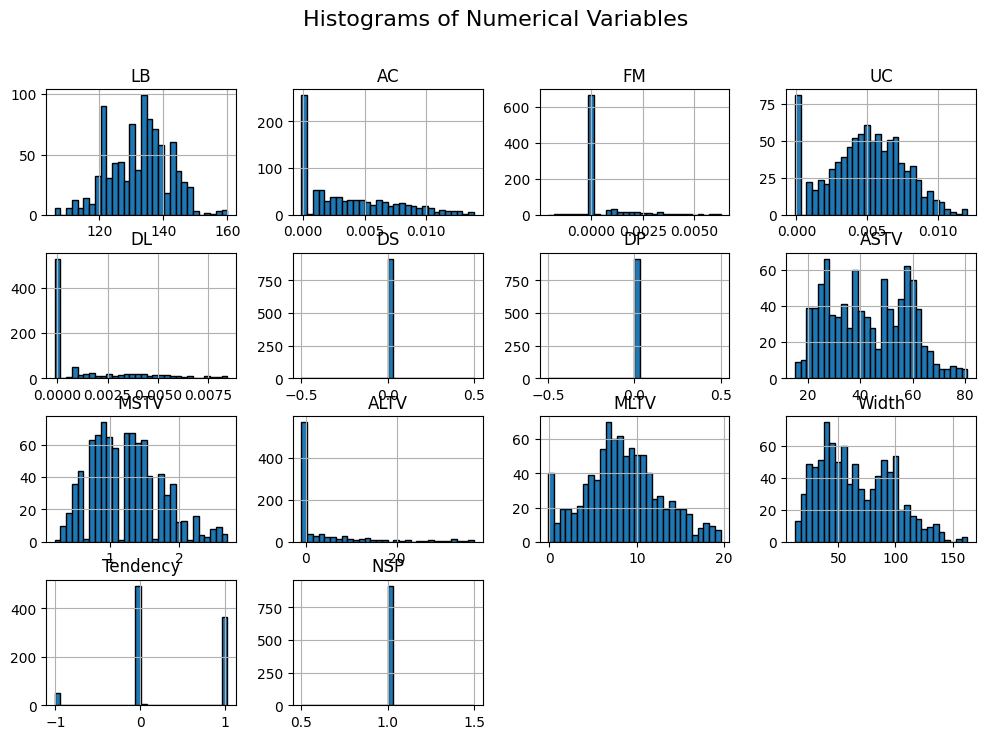

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()


# Insights:

Are variables normally distributed or skewed?

Are there peaks (high concentrations of data) in specific ranges?

Are there extreme values suggesting outliers?


<Figure size 1200x600 with 0 Axes>

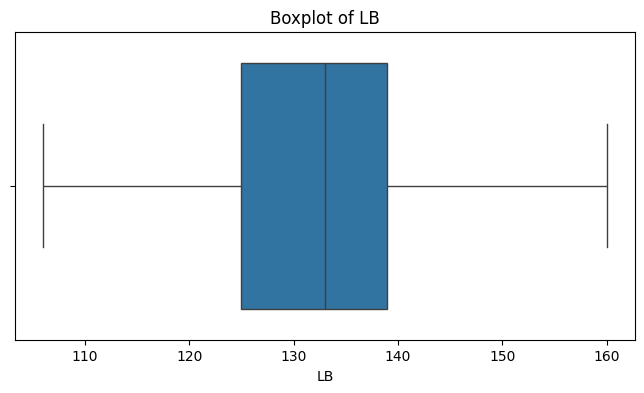

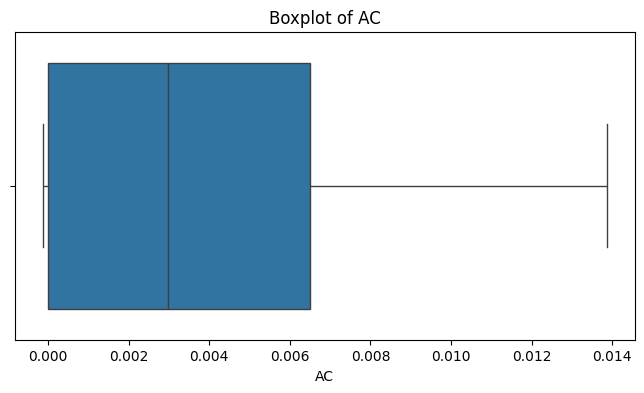

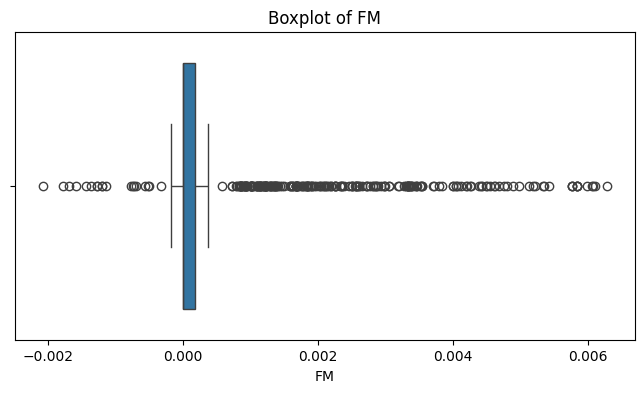

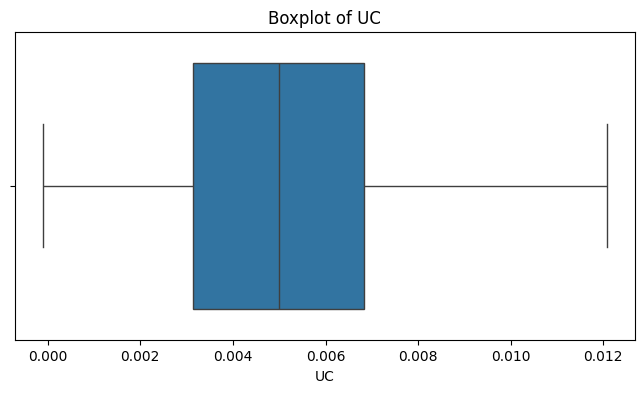

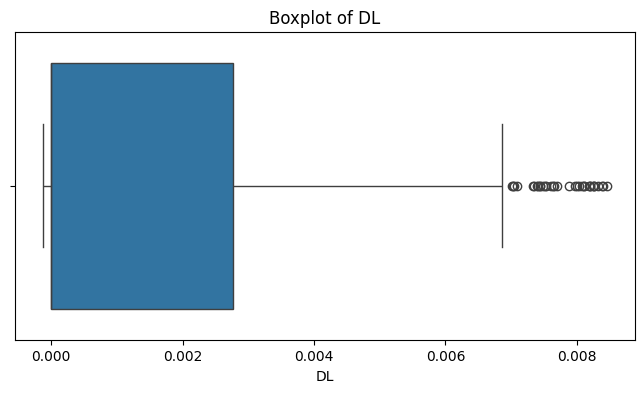

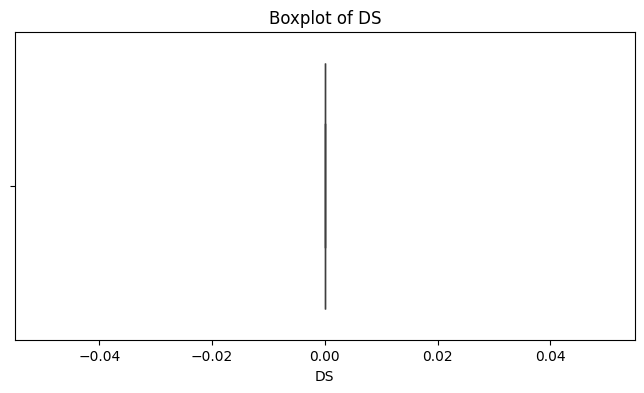

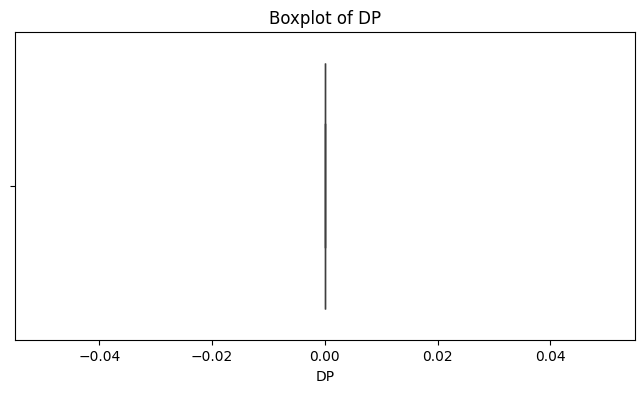

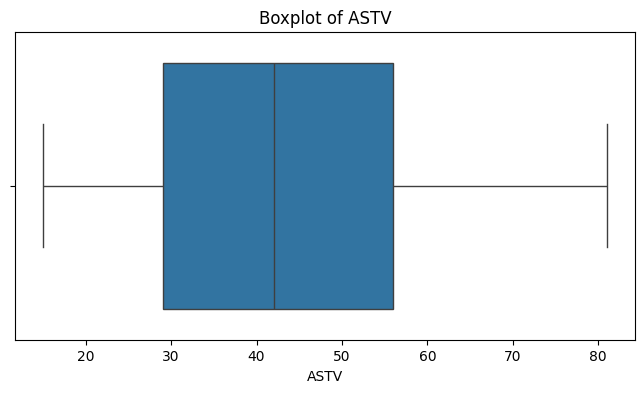

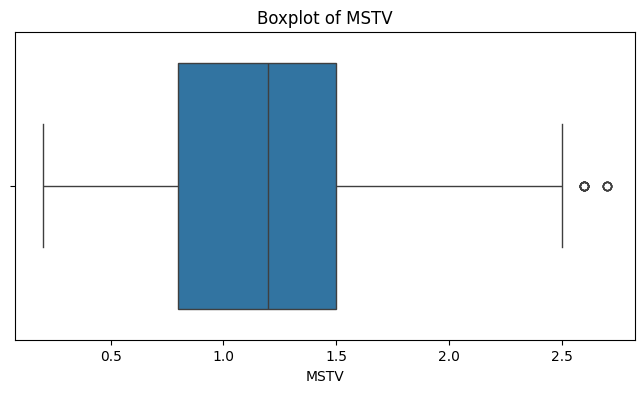

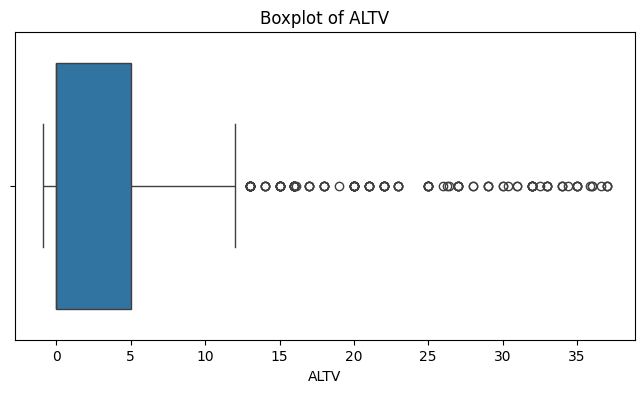

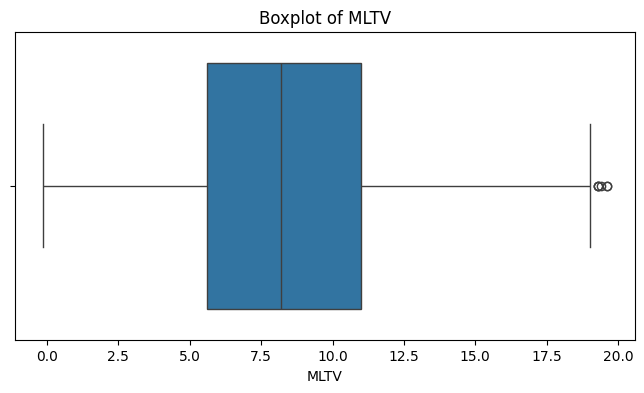

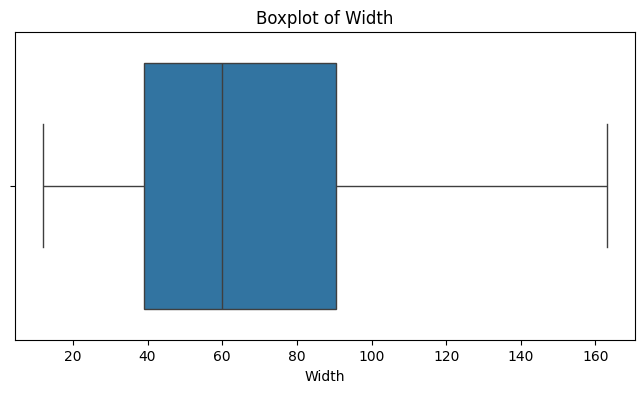

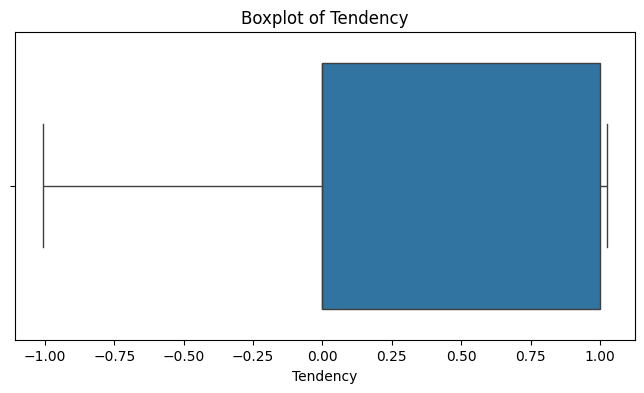

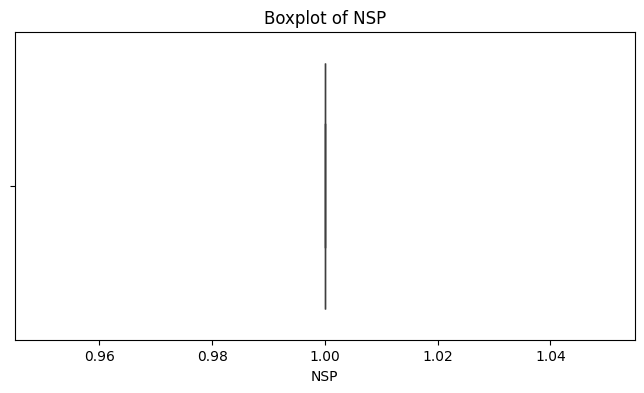

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Insights:

Do features like LB, AC, UC, and ASTV have extreme values?

Should we remove or transform outliers?

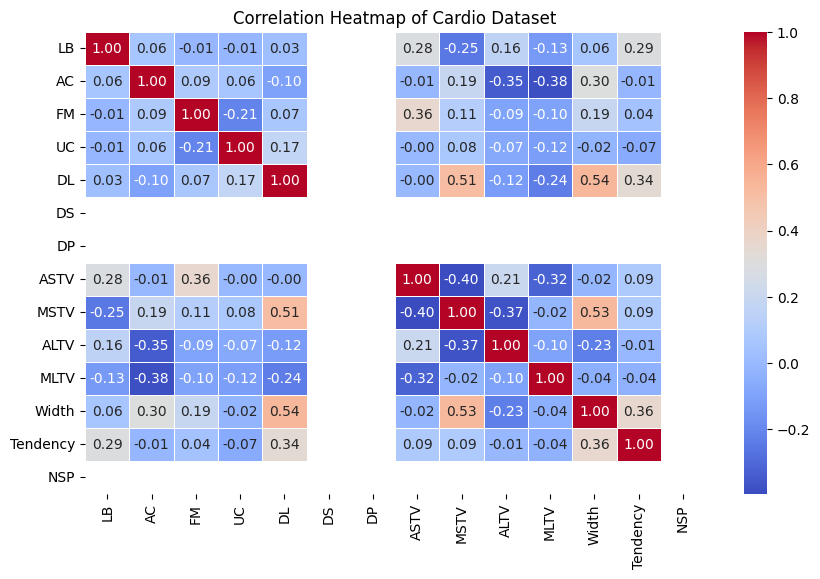

In [ ]:
plt.figure(figsize=(10, 6))

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Cardio Dataset")
plt.show()


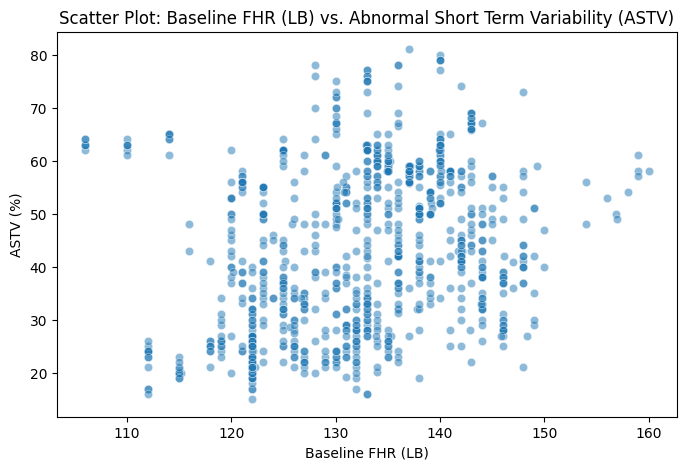

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['LB'], y=df['ASTV'], alpha=0.5)
plt.title("Scatter Plot: Baseline FHR (LB) vs. Abnormal Short Term Variability (ASTV)")
plt.xlabel("Baseline FHR (LB)")
plt.ylabel("ASTV (%)")
plt.show()


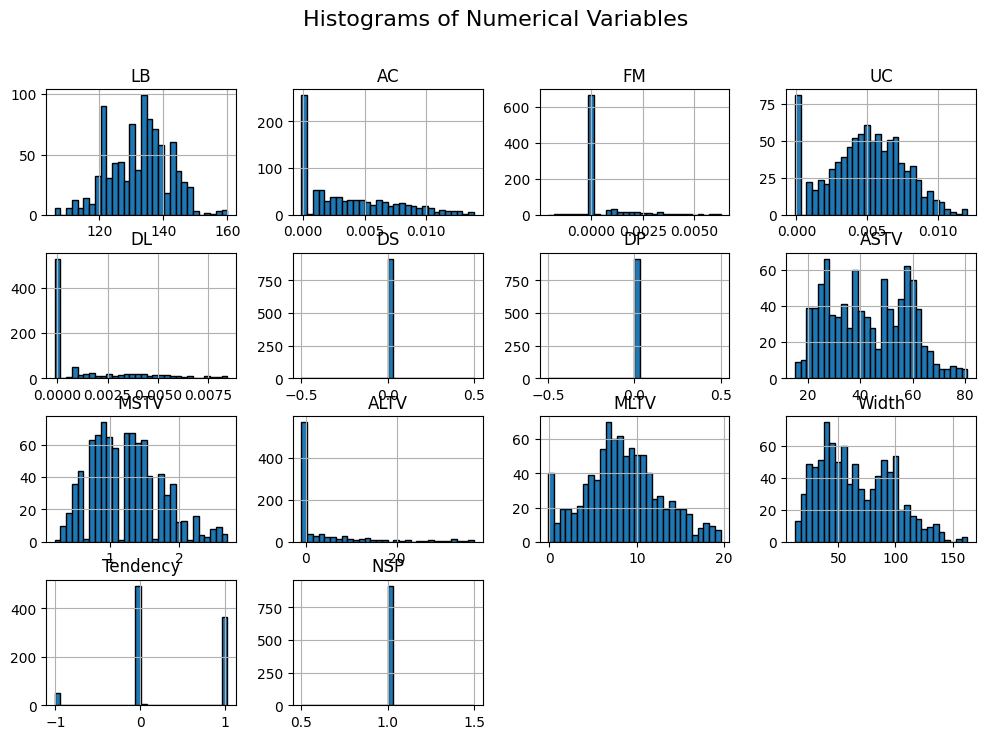

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()


<Figure size 1200x600 with 0 Axes>

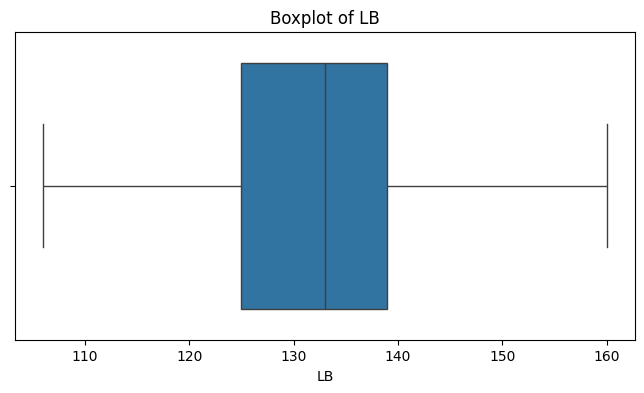

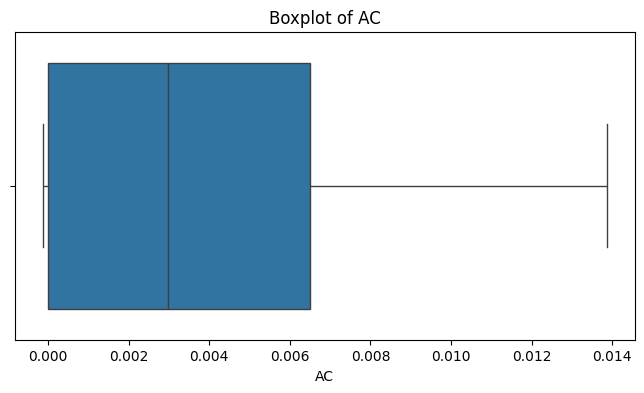

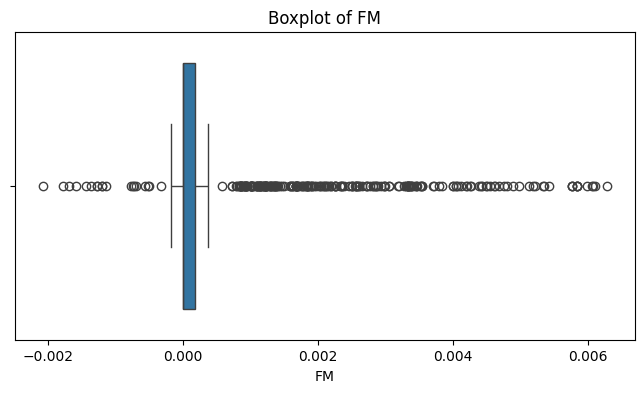

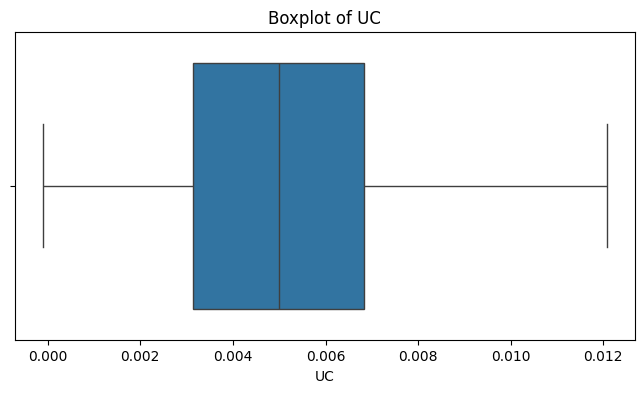

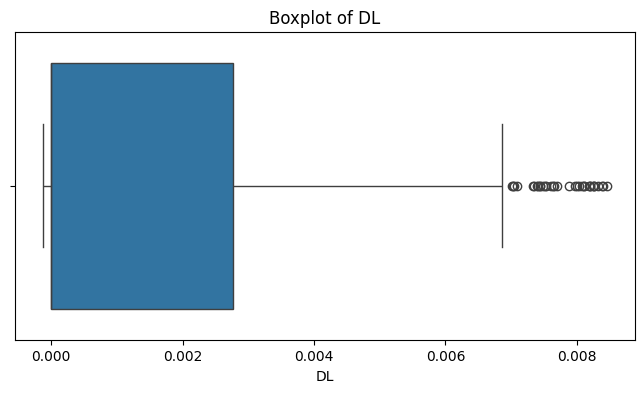

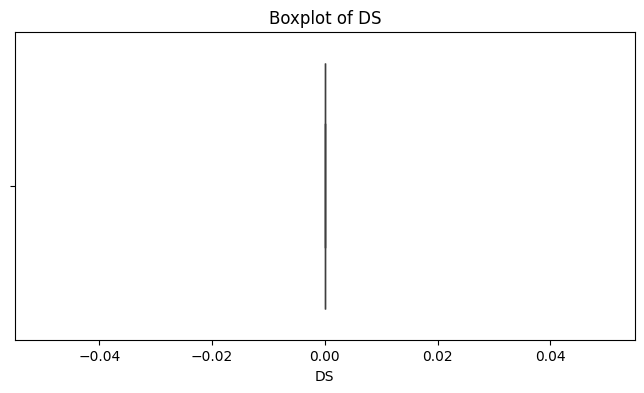

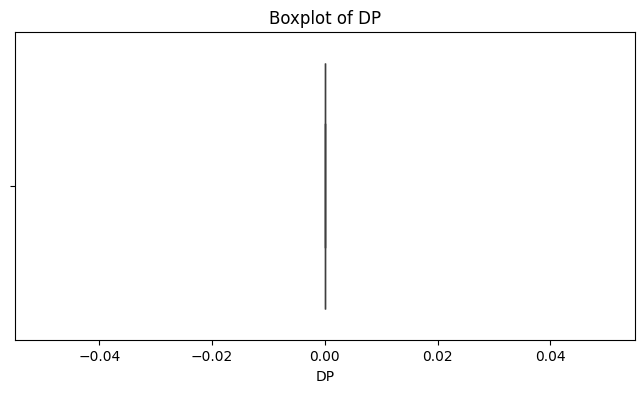

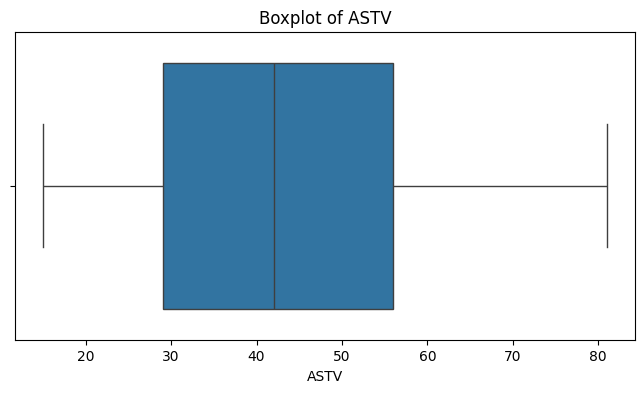

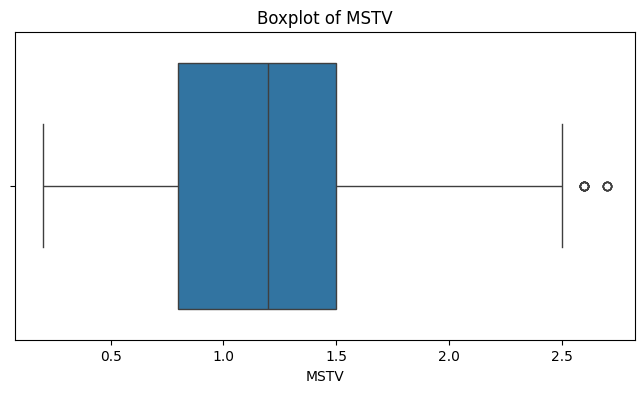

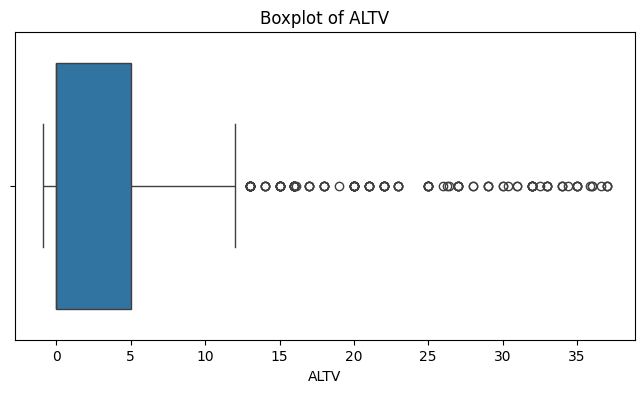

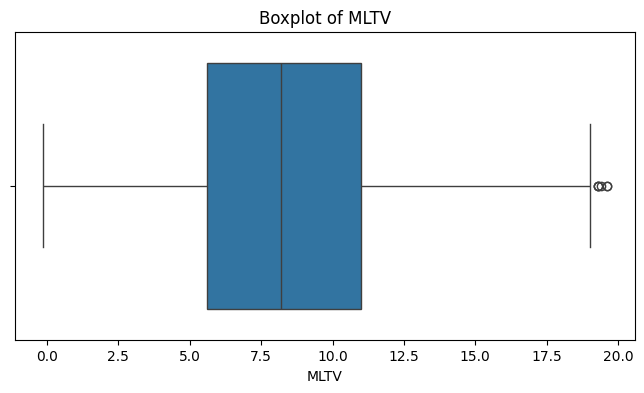

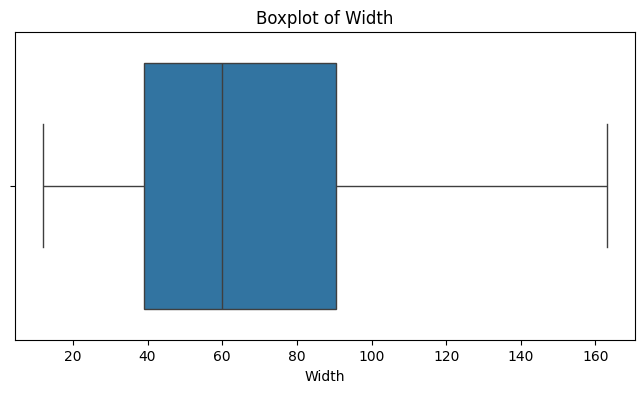

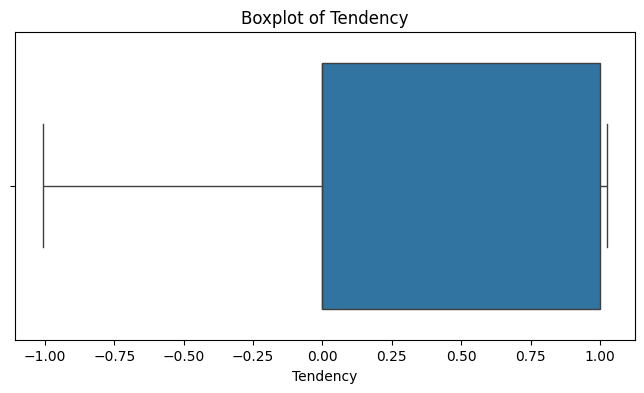

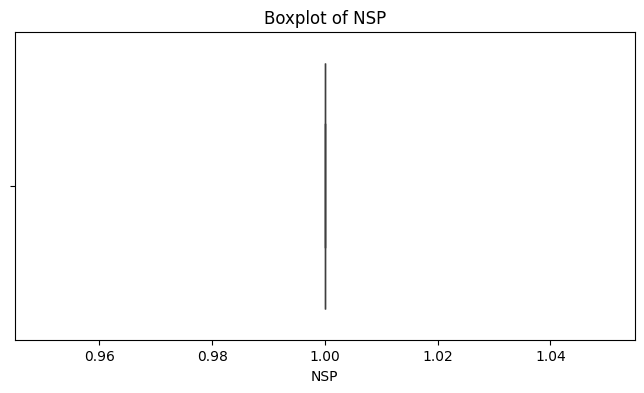

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
# Check if categorical variables exist
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart of {col}")
    plt.ylabel("Frequency")
    plt.show()

    # Pie chart
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'lightgreen'])
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")
    plt.show()


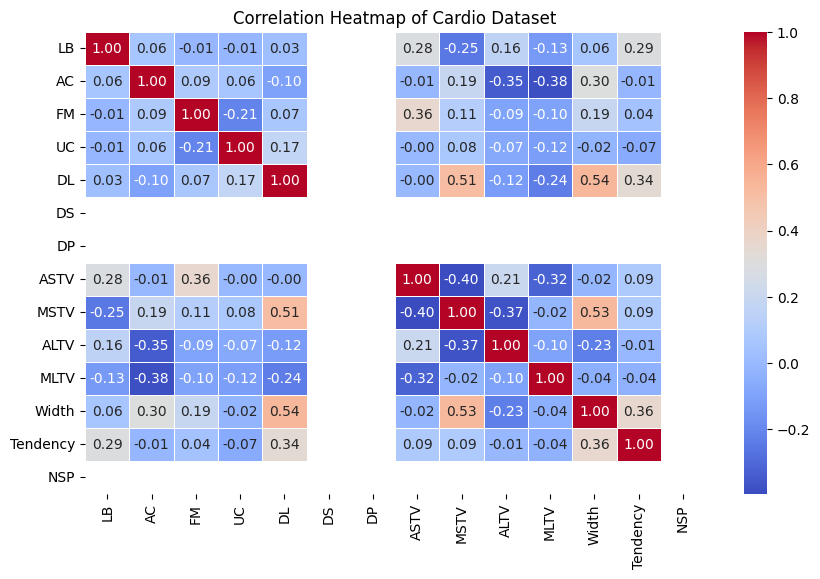

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Cardio Dataset")
plt.show()


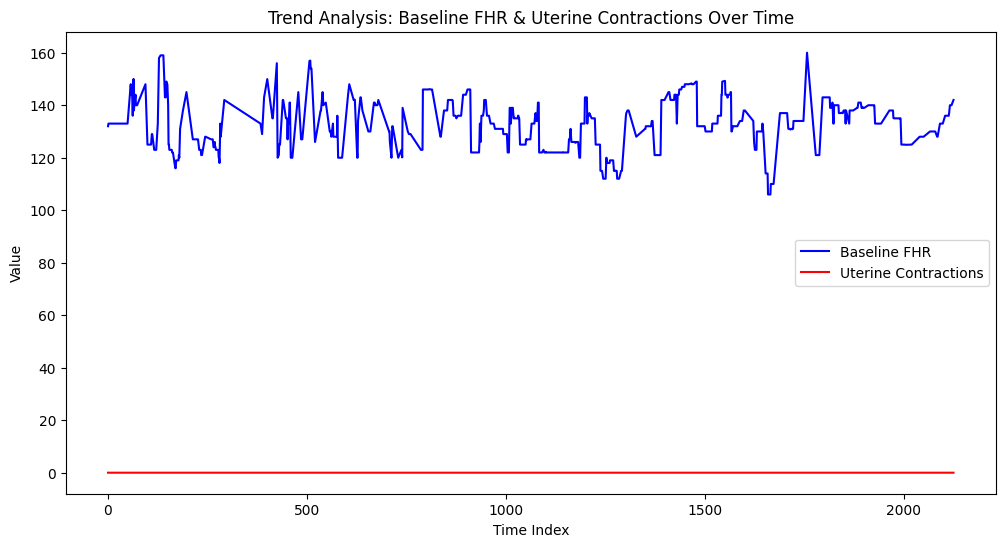

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LB'], label='Baseline FHR', color='blue')
plt.plot(df.index, df['UC'], label='Uterine Contractions', color='red')
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.title("Trend Analysis: Baseline FHR & Uterine Contractions Over Time")
plt.legend()
plt.show()


If LB fluctuates around contractions (UC), it may indicate a physiological response.

If ASTV increases over time, it might suggest an evolving fetal condition.

Through our exploratory data analysis (EDA) of the cardiographic dataset, we uncovered several key insights:

1) Distribution of Variables (Histograms & Boxplots)

 Some variables, like LB (Baseline FHR) and UC (Uterine Contractions), follow a near-normal distribution, while others, like ASTV (Abnormal Short-Term Variability), are skewed.
 Several features had outliers (e.g., extreme values in ASTV, UC, and DP), which we handled using the IQR method.
 Boxplots revealed potential clusters in the data, indicating subgroups within fetal heart rate patterns.

2) Correlation Insights (Heatmap & Scatter Plots)

 Strong correlations were found between ASTV & MSTV, indicating that these features capture similar fetal variability aspects.
 LB & UC showed some correlation, suggesting a link between fetal heart rate and uterine contractions.
 Some variables had low correlation, meaning they may capture independent fetal conditions, which is useful for predictive modeling.

3) Trends Over Time (If Temporal Data Available)

 If data is sequential, trends suggest that fetal heart rate (LB) changes with uterine contractions (UC), which could help detect fetal distress.
 ASTV and ALTV (long-term variability) show fluctuations, potentially indicating periodic stress or recovery cycles.